In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
from datetime import datetime

In [61]:
weather_data = pd.read_csv('weather_data.csv')
weather_data

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,30/08/2021,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


In [62]:
missing_data = weather_data[weather_data['Maximum temperature (°C)'].isnull()]
print(missing_data)

          Date  Minimum temperature (°C)  Maximum temperature (°C)  \
188  8/07/2021                       NaN                       NaN   

     Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
188            NaN               1.8               8.3   

    Direction of maximum wind gust   Speed of maximum wind gust (km/h)  \
188                             NaN                                NaN   

    Time of maximum wind gust  9am Temperature (°C)  ...  \
188                       NaN                   NaN  ...   

     9am cloud amount (oktas)  9am wind direction 9am wind speed (km/h)  \
188                         2                 NaN                   NaN   

    9am MSL pressure (hPa)  3pm Temperature (°C)  3pm relative humidity (%)  \
188                    NaN                  12.0                         55   

     3pm cloud amount (oktas)  3pm wind direction 3pm wind speed (km/h)  \
188                       6.0                  NE                     9   

    3pm MSL

In [63]:
#replace empty Max temperature record with median max temp
x = weather_data["Maximum temperature (°C)"].median()
print(x)
weather_data["Maximum temperature (°C)"].fillna(x, inplace = True)
weather_data.iloc[[188]]

18.3


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
188,8/07/2021,NaN,18.3,NaN,1.8,8.3,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,12.0,55,6.0,NE,9,1019.4


In [64]:
#Create new column - variance between max temp for the day vs average max temp
#Note that the variance is absolute i.e. negative variance converted to positive
#Initial reasoning is that energy use may increase if weather is too cold or hot
weather_data['Var to avg max temp'] = round((weather_data['Maximum temperature (°C)']-weather_data['Maximum temperature (°C)'].mean()).abs(),1)
#Convert date column to make date format consistent with price demand
weather_data['Date'] = pd.to_datetime(weather_data['Date'], dayfirst = True).dt.date
weather_data.sort_values('Date')
weather_data.tail()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Var to avg max temp
238,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4,5.8
239,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5,1.6
240,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,N,13,1011.4,12.8,84,7.0,S,6,1010.4,3.2
241,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2,1.8
242,2021-08-31,11.0,20.1,0.0,5.8,3.6,N,61.0,16:29,13.5,...,N,17,NaN,19.4,43,6.0,N,30,1012.2,0.7


In [65]:
price_demand = pd.read_csv('price_demand_data.csv')

In [66]:
price_demand.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [67]:
#convert settlement date format to exclude time of the day
price_demand['DATE'] = pd.to_datetime(price_demand['SETTLEMENTDATE'], dayfirst = True).dt.date
price_demand.sort_values('DATE')
price_demand.tail()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,DATE
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31
11663,VIC1,1/09/2021 0:00,4811.27,MEDIUM,2021-09-01


In [68]:
#group totaldemand by the date to obtain total energy demand for each date
demand_bydate = price_demand.groupby('DATE')['TOTALDEMAND'].sum().reset_index(name='TOTALDEMAND')
demand_bydate.tail()

,DATE,TOTALDEMAND
239,2021-08-28,209104.93
240,2021-08-29,224449.35
241,2021-08-30,232158.40
242,2021-08-31,226540.29
243,2021-09-01,4811.27


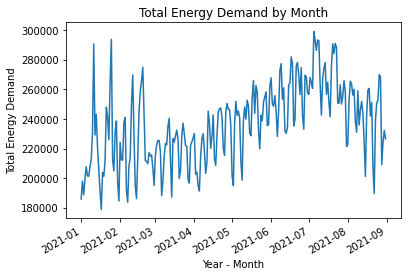

In [81]:
#Draw line chart to show demand movement from Jan'21 to Aug'21
plt.plot(weather_data['Date'],weather_data['TOTALDEMAND'].loc[0:242])
plt.title("Total Energy Demand by Month")
plt.gcf().autofmt_xdate()
plt.xlabel("Year - Month")
plt.ylabel("Total Energy Demand")
plt.show()

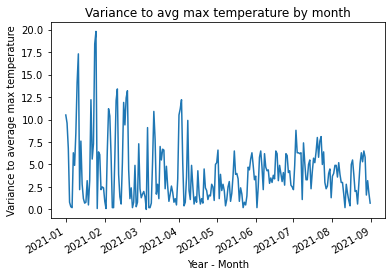

In [84]:
#Draw line chart to show max temperature movement from Jan'21 to Aug'21
plt.plot(weather_data['Date'],weather_data['Var to avg max temp'])
plt.title("Variance to avg max temperature by month")
plt.gcf().autofmt_xdate()
plt.xlabel("Year - Month")
plt.ylabel("Variance to average max temperature")
plt.show()

In [85]:
#Merge the data - var to avg max temp + Total Demand for the relevant date
merged_data = demand_bydate.join(weather_data.set_index('Date'), on='DATE')[["DATE","Var to avg max temp","TOTALDEMAND"]]
merged_data.tail()

,DATE,Var to avg max temp,TOTALDEMAND
239,2021-08-28,1.6,209104.93
240,2021-08-29,3.2,224449.35
241,2021-08-30,1.8,232158.40
242,2021-08-31,0.7,226540.29
243,2021-09-01,NaN,4811.27


In [86]:
#Delete data dated 2021-09-01
merged_data.dropna(inplace = True)
merged_data.tail()

,DATE,Var to avg max temp,TOTALDEMAND
238,2021-08-27,5.8,268490.26
239,2021-08-28,1.6,209104.93
240,2021-08-29,3.2,224449.35
241,2021-08-30,1.8,232158.40
242,2021-08-31,0.7,226540.29


Text(0, 0.5, 'Variance to Average Max Temperature(°C)')

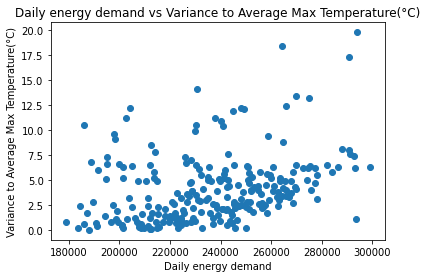

In [87]:
#Print scatter plot
plt.scatter(merged_data['TOTALDEMAND'],merged_data['Var to avg max temp'])
plt.title("Daily energy demand vs Variance to Average Max Temperature(°C)")
plt.xlabel("Daily energy demand")
plt.ylabel("Variance to Average Max Temperature(°C)")

In [88]:
#Pearson coefficient is moderate (between 0.3 to 0.5)
print("Pearson r is ",merged_data['TOTALDEMAND'].corr(merged_data['Var to avg max temp']))

Pearson r is  0.33156302844505825


In [92]:
#Build Regression Model - not yet done just started
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
